## Convocatoria 1 - Proyecto 2

## Alejandro Minguez Molina - Joan Olivan Marquina

### Ejercicio 1 (4 puntos)
Utilizar el conjunto de datos "dataset_1.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

#### 1.a) Imputación de valores ausentes (2 puntos)

- En aquellas instancias (filas) que contengan UN ÚNICO VALOR NaN en alguno de sus atributos (columnas), se imputará dicho valor.
 * Si el atributo corresponde a una variable discreta, se imputará el valor utilizando la moda de dicho atributo. 
 * Si el atributo corresponde a una variable continua, se imputará el valor utilizando la media de dicho atributo. 
- Aquellas instancias (filas) que contengan MÁS DE UN VALOR NaN en sus atributos, deberán ser eliminadas por completo. 

Los outputs deberán ser: 
- Una matriz "X" de dimensiones M x N, donde M será el número de instancias y N, el de atributos.
- Un vector "y" de dimensiones M. 

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
import pandas as pd

dataset = np.load('dataset_1.npy')

X_dataset = dataset[:,:-1]
y_dataset = dataset[:, -1]
print(np.shape(X_dataset))
print(np.shape(y_dataset))

display (np.count_nonzero(np.isnan(X_dataset), axis = 1))
# Como vemos, las filas con valores ausentes contienen o 1 valor nan o todos sus atributos a nan
#por lo que eliminaremos todas las filas que tengan todos sus valores a nan

id_nan = np.argwhere(np.isnan(X_dataset).all(axis=1))
X_dataset = np.delete(X_dataset, id_nan, 0)
y_dataset = np.delete(y_dataset, id_nan, 0)

print(np.shape(X_dataset))
print(np.shape(y_dataset))


#IMPUTAMOS LOS VALORES AUSENTES 

X_dataset = pd.DataFrame(X_dataset)

continua_cols = X_dataset.select_dtypes(include=['float64']).columns.to_list()
discreta_cols = X_dataset.select_dtypes(include=['int']).columns.to_list()

# Transformaciones para las variables numéricas
continua_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])


# Transformaciones para las variables categóricas
discreta_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', continua_transformer, continua_cols),
        ('cat', discreta_transformer, discreta_cols),
    ]
)


X_dataset_sin_ausentes = preprocessor.fit_transform(X_dataset)

#print(X_dataset_sin_ausentes)

#print(np.shape(X_dataset_sin_ausentes))
#print(np.shape(y_dataset))

display (np.count_nonzero(np.isnan(X_dataset_sin_ausentes), axis = 1))

#Los valores devueltos son:
print(np.shape(X_dataset_sin_ausentes))
print(np.shape(y_dataset))

(500, 8)
(500,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

(495, 8)
(495,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

(495, 8)
(495,)


#### 1.b) Eliminación de valores outliers extremos (2 puntos)
- Aplicar el método de Elliptic Envelope fijando una semilla en 42
- Utilizar el diagrama de caja y bigotes para establecer los umbrales de decisión
- Plotear el diagrama (box and whiskers) obtenido a partir de las puntuaciones calculadas con el método Elliptic Envelope
- Eliminar las instancias que contengan valores outliers extremos

Los outputs deberán ser: 
- Una matriz "X" de dimensiones M' x N, donde M' será el nuevo número de instancias y N, el de atributos.
- Un vector "y" de dimensiones M'. 

In [3]:
import pandas as pd
from scipy import stats
from sklearn.covariance import EllipticEnvelope


EllipticEnvelope(random_state=42).fit(X_dataset_sin_ausentes)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-36.753609686756093 > -38.965920352619932). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-36.909048558471568 > -37.116908932711318). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-37.941874238481759 > -38.688432016707047). You

EllipticEnvelope(random_state=42)

### Ejercicio 2 (6 puntos)

Crear un programa, con comentarios que aclaren el código, donde se computen las métricas MAE, MSE, RMSE, MAPE y R2 aplicando los regresores OLS y KNN en DOS datasets de regresión (a elegir). Nota: Al menos uno de los datasets deberá ser externo a la librería de scikit-learn.

Se debe llevar a cabo:
- Exploración de los datos y descripción del dataset
- Tratamiento de outliers y valores perdidos (si los hay)
- Partición externa de datos
- Estandarización de los datos
- Selección de atributos mediante métodos supervisados (solo uno)
- Validación cruzada interna para optimizar los hiperparámetros de los algoritmos (si procede)
- Modelado
- Predicción y evaluación sobre el conjunto de test (resultados cuantitativos y cualitativos)
- Breve discusión comparando los resultados obtenidos con cada método.

## Programa sobre dataset externo

In [4]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split 
import sklearn.metrics as metrics 
from math import sqrt

from sklearn import preprocessing

from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, LeaveOneOut

import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import warnings
import os
warnings.filterwarnings("ignore") 

EXPLORACION DE LOS DATOS Y DESCRIPCION DEL DATASET

El conjunto de datos que vamos a analizar hace referencia al precio de los seguros médicos. En el podemos encontrar el precio dado para unas determinadas carácterísticas sobre el asegurado.

Columnas

age: edad del beneficiario
sex: genero
bmi: Índice de masa corporal, medido con el peso y la altura. El ideal está entre 18.5 y 24.
children: Numero de hijos o personas dependientes
smoker: Si fuma, si o no
region: Área de Estados Unidos donde reside
charges: Coste del seguro, columna que indica la clase

In [5]:
pathToImport = os.path.join("data","medical.csv")
dataset = pd.read_csv(pathToImport,engine='python', encoding='latin-1')


print(dataset.head())
(dataset.shape)
(dataset.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


TRATAMIENTO DE OUTLIERS Y VALORES PERDIDOS

In [6]:
dataset.info()
dataset.isna().sum()
dataset.shape
# No hay valores perdidos que tratar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(1338, 7)

PARTICION EXTERNA DE DATOS

In [9]:
#Partimos los datos en el conjunto de entrenamiento (80%) y el de test (20%)
dsTrain, dsTest = train_test_split(dataset, test_size=0.2, shuffle=True, random_state=42)

dsTrain = dsTrain.to_numpy()
dsTest = dsTest.to_numpy()
print(type(dsTrain))

X_train = dsTrain[:,:-1]
print(type(X_train))
y_train = dsTrain[:, -1]

X_test = dsTest[:,:-1]
y_test = dsTest[:, -1]

print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1070, 6)
(1070,)
(268, 6)
(268,)


ESTANDARIZACION DE LOS DATOS

In [11]:
#print(type(X_train))
X_train_ = X_train
X_test_ = X_test

X_train_pd = pd.DataFrame(X_train)
X_test_pd = pd.DataFrame(X_test)



# Dividimos las columnas en tipos
columnas_numericas = X_train_pd.select_dtypes(include=['float64', 'int64']).columns
columnas_categoricas = X_train_pd.select_dtypes(include=['category', 'object']).columns

# Creamos las transformaciones dependiendo del tipo
transformacion_numericas = Pipeline(steps=[
    ('scaler', StandardScaler())])

transformacion_categoricas = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Creamos el transformador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformacion_numericas, columnas_numericas),
        ('cat', transformacion_categoricas, columnas_categoricas)])


## Transformamos
preprocessor.fit(X_train_)
X_train_ = preprocessor.transform(X_train_)
X_test_ = preprocessor.transform(X_test_)



SELECCION DE LOS ATRIBUTOS

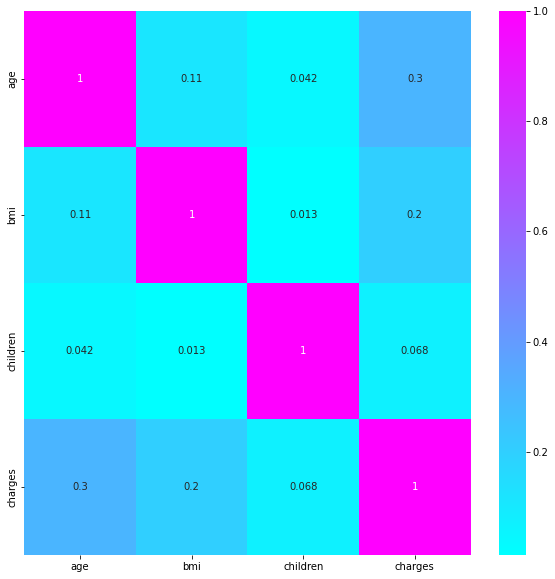

In [12]:

f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(dataset.corr(), annot=True, cmap='cool')
plt.show()


No existe correlación suficiente para eliminar algún atributo

VALIDACION CRUZADA

In [13]:
algos = {
    "ols": LinearRegression(normalize = True, n_jobs = 1000),
    "knn": KNeighborsRegressor(n_neighbors=10)
}

metricas = {
  'MAE': 'neg_mean_absolute_error',
  'RMSE': make_scorer(
          lambda y, y_pred:
            sqrt(mean_squared_error(y, y_pred)),
            greater_is_better=False),
  'MAPE': make_scorer(
          lambda y, y_pred:
            np.mean(np.abs((y - y_pred) / y)) * 100,
            greater_is_better=False)}

In [14]:

#Ejecutamos el cross validate para los dos algoritmos
for a in algos:
            
    evaluacion = cross_validate(algos[a], 
                               X_train_, y_train,
                               cv = KFold(n_splits=5, shuffle=True, random_state=42),
                               scoring = metricas)  



    print("ALGORITMO " + a)
    print(evaluacion)
            

ALGORITMO ols
{'fit_time': array([0.01721597, 0.01092601, 0.01004505, 0.01661396, 0.01558685]), 'score_time': array([0.00216985, 0.00066495, 0.00062418, 0.00102019, 0.00165296]), 'test_MAE': array([-5397.2833966 , -5956.32026679, -5593.017561  , -5626.6784224 ,
       -5415.33153595]), 'test_RMSE': array([-7387.33546611, -8145.5982286 , -7385.16657284, -7774.95416633,
       -7114.97134081]), 'test_MAPE': array([-65.0608797 , -74.4716283 , -94.78835026, -68.33974207,
       -61.84352978])}
ALGORITMO knn
{'fit_time': array([0.00086093, 0.00137496, 0.00079823, 0.00173402, 0.00101614]), 'score_time': array([0.01467538, 0.0104084 , 0.00619173, 0.00692415, 0.00642705]), 'test_MAE': array([-5607.61182864, -5636.46565012, -4989.52545986, -5487.37252313,
       -5368.15791985]), 'test_RMSE': array([-7919.84837965, -7997.02665597, -6655.43466877, -7885.25296553,
       -7512.81261735]), 'test_MAPE': array([-63.40795673, -65.52052371, -80.46526685, -63.91764847,
       -60.57834784])}


MODELADO

In [15]:
#Hacemos el modelado definitivo

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_, y_train)

ols = LinearRegression(normalize = True, n_jobs = 1000)
ols.fit(X_train_, y_train)

LinearRegression(n_jobs=1000, normalize=True)

PREDICCION

In [16]:
y_pred_knn = knn.predict(X_test_) 
y_pred_ols = ols.predict(X_test_)

print(y_pred_knn)

print('Error MAE en test KNN: ', mean_absolute_error(y_pred_knn, y_test))
print('Error MAE en test OLS: ', mean_absolute_error(y_pred_ols, y_test))


[10298.977252 10967.413991999998 25735.578054 11094.849105 11891.2562
 7006.705236999999 7085.613862 7964.445519999999 9722.961758
 11976.914640000003 27140.923193999995 11574.097906 4745.45698
 30842.983799 38893.866508 36843.42375 8545.03309 22353.9854 7753.732356
 29419.957896999997 6719.98744 5961.4574 2576.7286 8112.131187999999
 11285.031334000001 6426.9640850000005 8630.498892000001 9248.000945999998
 13485.506375 1322.8922900000002 6650.6402 8246.787637 8963.551259
 11369.735661 7966.919736999999 8223.19067 11157.039886999999
 8242.478317000001 24652.373315000004 34575.18337499999 3207.5257
 8438.779792 8802.839097 11934.142254 9518.400801 7706.2472370000005
 13422.150315999996 7534.822099999999 31905.865444999996 6917.59688
 7280.4236439999995 3514.67882 7377.4064849999995 3963.5000200000004
 4944.697139999999 11628.923692 4713.927085 33412.961941 7713.614885000001
 9960.059057999999 8816.799920000001 7255.552379999999 8048.899
 9523.374158999999 10649.318057999999 6956.55871 

PROCESO SOBRE EL CONJUNTO DE DATOS DENTRO DE SKLEARN